## K-means Clustering and Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
from scipy.io import loadmat # used to implement mat file type
import ex7_func as fn
from sklearn import svm
from scipy import misc # used to convert image to a 3d matrix
import scipy.misc #Used to show matrix as an image
import random as rd
# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
% matplotlib inline

## 1 K-means Clustering

In this this exercise, the K-means algorithm is implemented to and used for image compression.  It will start on an example 2D dataset that will help to gain an intuition of how the K-means algorithm works. After that, the K-means algorithm is used for image compression by reducing the number of colors that occur in an image to only those that are  most common in that image.

#### Loading and Visualizing Data

In [2]:
!ls

bird_small.mat	ex7_func.py
bird_small.png	ex7_func.pyc
ex7data1.mat	kedi.png
ex7data2.mat	k-means_clustering_and_principal_component_analysis.ipynb
ex7faces.mat


In [3]:
# Loading Data
directory = os.getcwd() + '/ex7data2.mat'
raw_data = loadmat(directory)
print raw_data.keys()

X = np.array(raw_data['X'])
X.shape

['X', '__version__', '__header__', '__globals__']


(300, 2)

#### Find Closest Centroids

In [4]:
# Select an initial set of centroids
K = 3; # 3 Centroids
initial_centroids = np.array([[3,3], [6,2], [8,5]])
initial_centroids.shape

(3, 2)

In [5]:
reload(fn)

idx = fn.findClosestCentroids(X, initial_centroids)

print 'Closest centroids for the first 3 examples:{}'.format(idx[:3]+1)
print '\n(the closest centroids should be 1, 3, 2 respectively)'

Closest centroids for the first 3 examples:[ 1.  3.  2.]

(the closest centroids should be 1, 3, 2 respectively)


#### Compute Means

In [6]:
reload(fn)
centroids = fn.computeCentroids(X, idx, K)

print 'Centroids computed after initial finding of closest centroids:\n{}'.format(centroids)
print '\n(the centroids should be\n'
print '   [ 2.428301 3.157924 ]'
print '   [ 5.813503 2.633656 ]'
print '   [ 7.119387 3.616684 ]\n'


Centroids computed after initial finding of closest centroids:
[[ 2.42830111  3.15792418]
 [ 5.81350331  2.63365645]
 [ 7.11938687  3.6166844 ]]

(the centroids should be

   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]



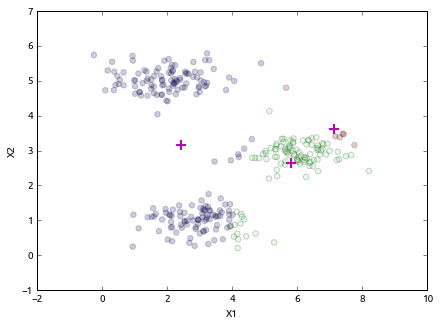

In [7]:
reload(fn)
# plot the data points and initial places of centroids
fn.plotkMeans(X, idx, centroids)

#### K-Means Clustering

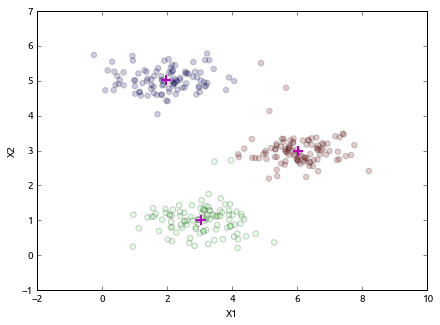

In [8]:
reload(fn)

# Settings for running K-Means
K = 3;
max_iters = 10;

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3,3], [6,2], [8,5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids,idx = fn.runkMeans(X, initial_centroids, max_iters)
fn.plotkMeans(X, idx, centroids)

#### Random initialization

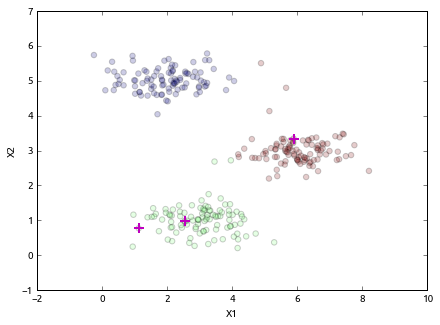

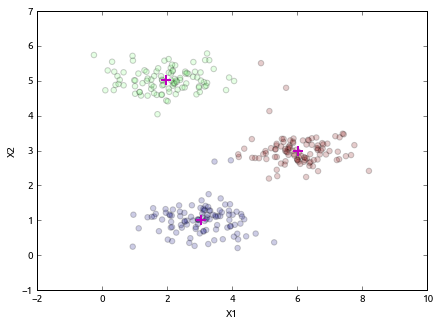

In [9]:
reload(fn)
# When using K-Means, it is important the initialize the centroids randomly. 
initial_centroids = fn.kMeansInitCentroids(X, K)
fn.plotkMeans(X, idx, initial_centroids)
# see if the kmeans stuck at local optima
centroids,idx = fn.runkMeans(X, initial_centroids, max_iters)
fn.plotkMeans(X, idx, centroids)

## K-Means Clustering on Pixels

The next task is to apply K-means to image compression. Clustering can be used to find a small number of colors that are most representative of the image, and map the original 24-bit (each pixel is repre sented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. ) colors to a lower-dimensional color space using the cluster assignments.This encoding is often refered to as the RGB encoding.  Our image contains thousands of colors, and in this part of the exercise, the number of colors will be reduced to 16 colors. Here's the image we're going to compress.

![title](bird_small.png)

In [10]:
# Loading Data
directory = os.getcwd() + '/bird_small.png'
A = misc.imread(directory) 
print A.shape, np.max(A)

(128, 128, 3) 255


In [11]:
# Divide by 255 so that all values are in the range 0 - 1
A = A / 255.

# Size of the image
size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
total_pixels = size[0]*size[1]
X = A.reshape(total_pixels,size[2])
X.shape

(16384, 3)

In [12]:
reload(fn)

# initialize some parameters
# can play witk K to see different results
K = 16
max_iters = 10

initial_centroids = fn.kMeansInitCentroids(X, K)

centroids, idx = fn.runkMeans(X, initial_centroids, max_iters)

#### Image Compression

In [13]:
reload(fn)
# In this part of the exercise, the clusters of K-Means is used to
# compress an image. To do this, we first find the closest clusters for 
# each example.

# Find closest cluster members
idx = fn.findClosestCentroids(X, centroids)

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by it's index in idx) to the centroid value
X_recovered = centroids[idx.astype(int),:]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(size[0],size[1],size[2])
X_recovered.shape

(128, 128, 3)

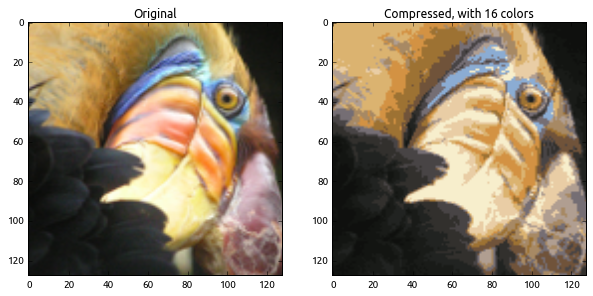

In [14]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(A)
ax[0].set_title('Original')
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed, with {} colors'.format(K));

## Play with my image

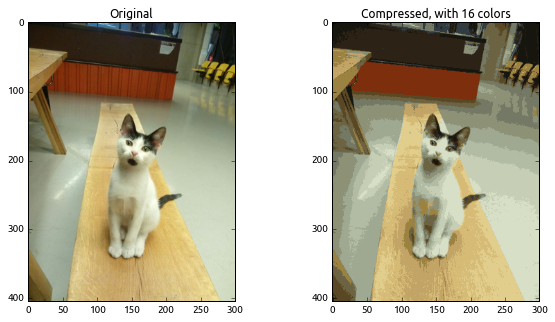

In [15]:
reload(fn)
# Loading Data
directory = os.getcwd() + '/kedi.png'
A = misc.imread(directory) 
# normalize values
A = A / 255.
size = A.shape
# reshape the 3d to 2d matrix 
total_pixels = size[0]*size[1]
X = A.reshape(total_pixels,size[2])
# initiazlize some parameters
K = 16
max_iters = 10
initial_centroids = fn.kMeansInitCentroids(X, K)
# find centroids
centroids, idx = fn.runkMeans(X, initial_centroids, max_iters)
# find data poins new values
X_recovered = centroids[idx.astype(int),:]
# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(size[0],size[1],size[2])
#finally compare the images
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(A)
ax[0].set_title('Original')
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed, with {} colors'.format(K));

## 2 Principal Component Analysis

In this exercise,principal component analysis (PCA) will be used to perform dimensionality  reduction.   First, there will be an  experiment  with  an  example  2D dataset  to  get  intuition  on  how  PCA  works,  and  then  use  it  on  a  bigger dataset of 5000 face image dataset.

#### Load Example Dataset

In [16]:
# Loading Data
directory = os.getcwd() + '/ex7data1.mat'
raw_data = loadmat(directory)
print raw_data.keys()

X = np.array(raw_data['X'])
X.shape

['X', '__version__', '__header__', '__globals__']


(50, 2)

[0.5, 6.5, 2, 8]

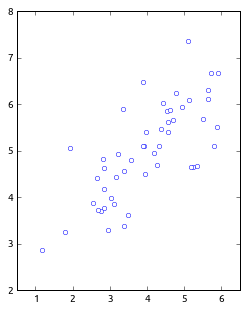

In [17]:
fig,ax = plt.subplots(figsize = (4,5))
ax.scatter(X[:,0],X[:,1], linewidths=0.5, c ='w', edgecolors='b')
ax.axis([0.5,6.5,2,8])

#### Principal Component Analysis

In [18]:
reload(fn) 

# Normalize the features
Xn,mu,sigma = fn.featureNormalize(X)

# compute pronciple components
U,S = fn.pca(Xn) 

print'Top eigenvector:{}'.format(U[0,:])
print'\n(you should expect to see -0.707107 -0.707107)\n'

Top eigenvector:[-0.70710678 -0.70710678]

(you should expect to see -0.707107 -0.707107)



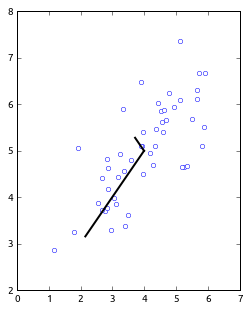

In [19]:
fig,ax = plt.subplots(figsize = (4,5))
ax.scatter(X[:,0],X[:,1], linewidths=0.5, c ='w', edgecolors='b')
ax.plot((mu[0],mu[0]+1.5*S[0]*U[0,0]),(mu[1],mu[1]+1.5*S[0]*U[0,1]),'k',lw=2)
ax.plot((mu[0],mu[0]+1.5*S[1]*U[1,0]),(mu[1],mu[1]+1.5*S[1]*U[1,1]),'k',lw=2)

#### Dimension Reduction

In [20]:
reload(fn)

# Project the data onto K = 1 dimension
K = 1
Z = fn.projectData(Xn, U, K)
# Approximation from the projection
X_rec = fn.recoverData(Z, U, K)

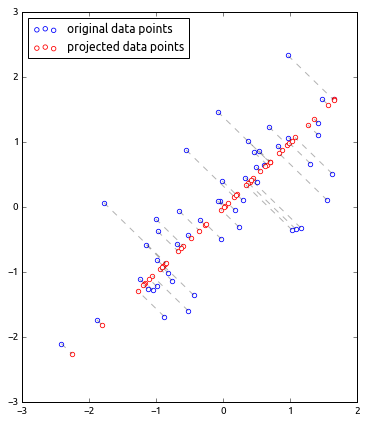

In [21]:
fig,ax = plt.subplots(figsize = (6,7))
ax.scatter(Xn[:,0],Xn[:,1], linewidths=0.8, c ='w', edgecolors='b',label='original data points')
ax.scatter(X_rec[:,0],X_rec[:,1], linewidths=0.8, c ='w', edgecolors='r', label='projected data points')
ax.plot((Xn[:,0],X_rec[:,0]) ,(Xn[:,1],X_rec[:,1]),'k--',alpha=.3); # projection errors
ax.legend(loc=2)

## Face Image Dataset

#### Loading and Visualizing Face Data

In [22]:
!ls

bird_small.mat	ex7_func.py
bird_small.png	ex7_func.pyc
ex7data1.mat	kedi.png
ex7data2.mat	k-means_clustering_and_principal_component_analysis.ipynb
ex7faces.mat


In [23]:
# Loading Data
directory = os.getcwd() + '/ex7faces.mat'
raw_data = loadmat(directory)
print raw_data.keys()

X = np.array(raw_data['X'])
X.shape


['X', '__version__', '__header__', '__globals__']


(5000, 1024)

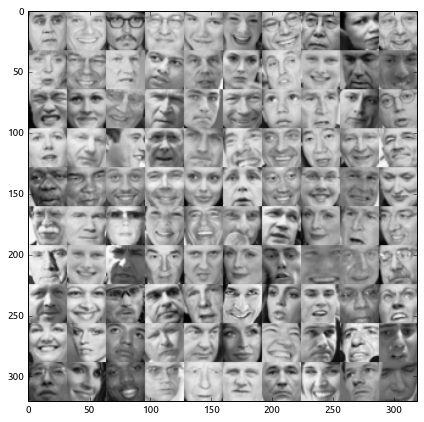

In [24]:
m,n = X.shape
fig = plt.figure(figsize=(7,7))
# initialize an array to concatenate
data_img = np.array(np.ones(320)).reshape(1,320)
for i in range(10):
    sel = rd.sample(range(1, m), 10) # randomly select 10 data points
    data1 = X[sel].reshape(32*10,32).T # select the given data points and reshape
    data_img = np.concatenate([data_img,data1]) 
plt.imshow(data_img,cmap = matplotlib.cm.Greys_r)

#### PCA on Face Data: Eigenfaces

In [25]:
reload(fn)

# Normalize features
X_norm, mu, sigma = fn.featureNormalize(X)
U, S = fn.pca(X_norm)

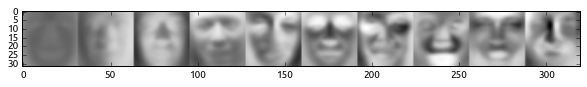

In [26]:
# visualize top  5 eigenvectors
size=10
plt.figure(figsize=(10,10))
plt.imshow(U[:,:size].T.reshape(32*size,32).T ,cmap = matplotlib.cm.Greys_r)

#### Dimension Reduction for Faces

In [27]:
reload(fn)

K = 100;
Z = fn.projectData(X_norm, U, K)
print Z.shape
var = np.sum(S[:K]) / np.sum(S)
print '\nfor k={}, {}% of variance is retained'.format(K,round(var*100,2))

(5000, 100)

for k=100, 93.19% of variance is retained


#### Visualization of Faces after PCA Dimension Reduction 

In [28]:
reload(fn)

X_rec  = fn.recoverData(Z, U, K);
X_rec.shape

(5000, 1024)

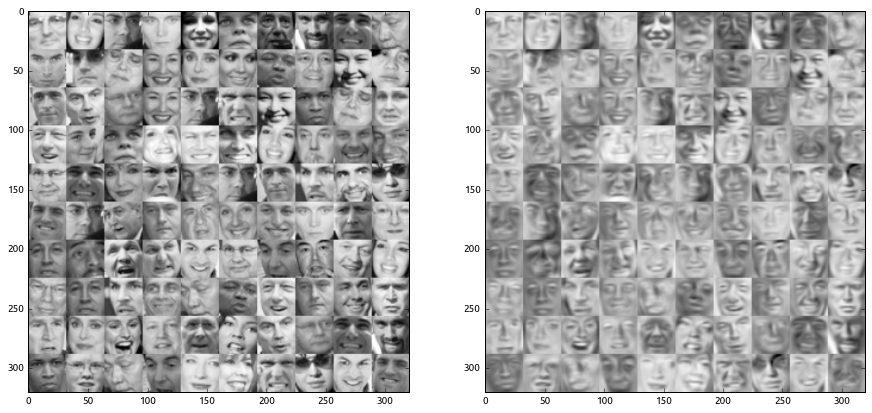

In [29]:
fig,ax = plt.subplots(1,2,figsize=(15,15))
# initialize an array to concatenate
data_img = np.array(np.ones(320)).reshape(1,320)
data_img_rec = np.array(np.ones(320)).reshape(1,320)
for i in range(10):
    sel = rd.sample(range(1, 101), 10) # randomly select 10 data points
    data1 = X[sel].reshape(32*10,32).T # select the given data points and reshape
    data2 = X_rec[sel].reshape(32*10,32).T # select the given data points and reshape
    data_img = np.concatenate([data_img,data1]) 
    data_img_rec = np.concatenate([data_img_rec,data2]) 
ax[0].imshow(data_img,cmap = matplotlib.cm.Greys_r)
ax[1].imshow(data_img_rec,cmap = matplotlib.cm.Greys_r)

## 3 PCA for visualization

In [30]:
reload(fn)
# Loading Data
directory = os.getcwd() + '/bird_small.png'
A = misc.imread(directory) 
print A.shape
# normalize values
A = A / 255.
size = A.shape
# reshape the 3d to 2d matrix 
total_pixels = size[0]*size[1]
X = A.reshape(total_pixels,size[2])
# initiazlize some parameters
K = 16
max_iters = 10
initial_centroids = fn.kMeansInitCentroids(X, K)
# find centroids
centroids, idx = fn.runkMeans(X, initial_centroids, max_iters)

(128, 128, 3)


#### Visualize the data and centroid memberships in 3D

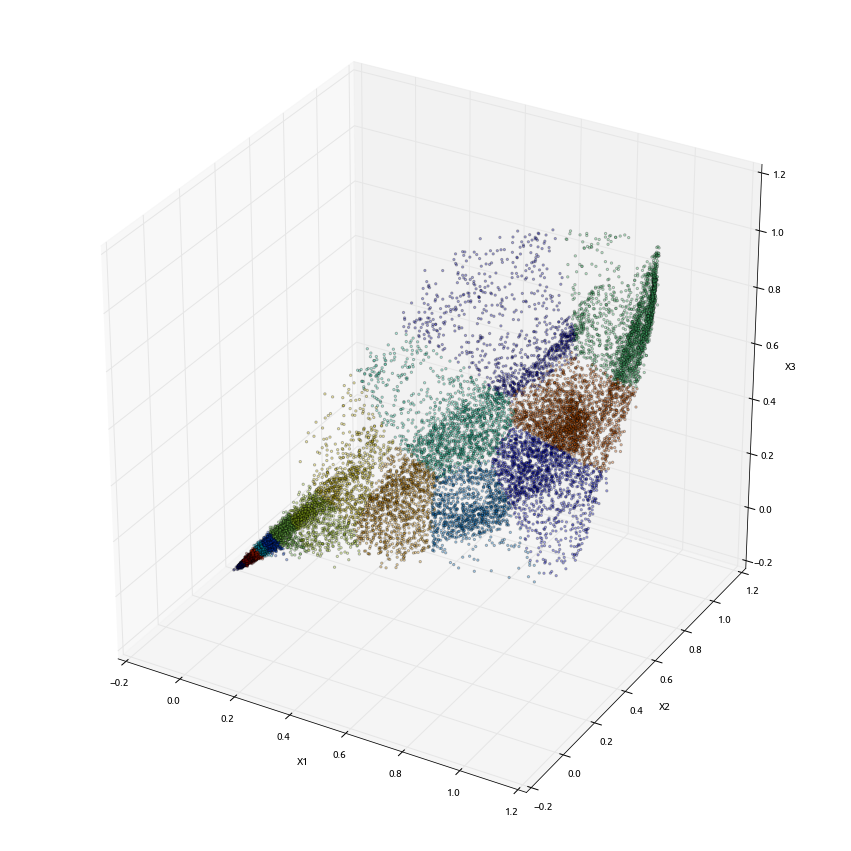

In [31]:
from mpl_toolkits.mplot3d import axes3d
# %matplotlib qt
%matplotlib inline

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

ax.scatter(X[:,0],X[:,1],X[:,2],c=idx, s=5, alpha=.3)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
# ax.view_init(elev=160, azim=160)              # elevation and angle
ax.dist=10                                    # distance
# fig.show()

#### Use PCA to project this cloud to 2D for visualization


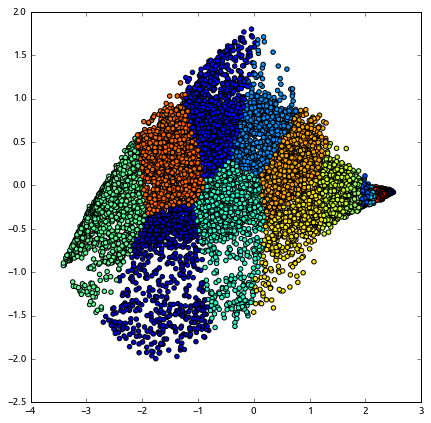

In [32]:
reload(fn)

# Normalize features
X_norm, mu, sigma = fn.featureNormalize(X)
U, S = fn.pca(X_norm)
# set the dimension to 2
K=2
Z = fn.projectData(X_norm, U, K)
# plot the 2D figure
plt.figure(figsize=(7,7))
plt.scatter(Z[:,0],Z[:,1],c=idx)

PCA projection can be thought of as a rotation that selects the view that maximizes the spread of the data, which often corresponds to the "best" view.